In [3]:
#jk

In [4]:
import pandas as pd
import numpy as np
import os
import glob
from tqdm.notebook import tqdm_notebook

import logging as lg

from pandas_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,precision_score, recall_score,  confusion_matrix, roc_curve, roc_auc_score, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

import pickle

In [5]:
def create_sub_dir_list(parent_dir_path):
    for root, dirs, files in os.walk(parent_dir_path):
        subdir_path_list = [os.path.join(root, name) for name in dirs]
        return subdir_path_list

In [6]:
parent_dir_path = 'R:/ML_New/FullStackDS/projects/ML/chl_activity_recognition_logistic_reg/data'
subdir_path_list = create_sub_dir_list(parent_dir_path)
subdir_path_list

['R:/ML_New/FullStackDS/projects/ML/chl_activity_recognition_logistic_reg/data\\bending1',
 'R:/ML_New/FullStackDS/projects/ML/chl_activity_recognition_logistic_reg/data\\bending2',
 'R:/ML_New/FullStackDS/projects/ML/chl_activity_recognition_logistic_reg/data\\cycling',
 'R:/ML_New/FullStackDS/projects/ML/chl_activity_recognition_logistic_reg/data\\lying',
 'R:/ML_New/FullStackDS/projects/ML/chl_activity_recognition_logistic_reg/data\\sitting',
 'R:/ML_New/FullStackDS/projects/ML/chl_activity_recognition_logistic_reg/data\\standing',
 'R:/ML_New/FullStackDS/projects/ML/chl_activity_recognition_logistic_reg/data\\walking']

In [7]:
def load_data(subdir_path_list):

    main_df = []

    for subdir_path in tqdm_notebook(subdir_path_list):
        dir_name = subdir_path.split('\\')[-1]
        sub_df = []

        for file in glob.glob(os.path.join(subdir_path, '*')):
            tmp_df = pd.read_csv(file, skiprows=4, error_bad_lines=False)
            sub_df.append(tmp_df)

        tmp_df_concat = pd.concat(sub_df)
        tmp_df_concat['label'] = dir_name
        
        # missing value imputation
        #if any null values, will replace with mean value of that column
        if tmp_df_concat.isnull().any().any():
            for col in tmp_df_concat.columns:
                if tmp_df_concat[col].isnull().values.any():
                    tmp_df_concat[col].fillna(tmp_df_concat[col].mean(), inplace=True)

        main_df.append(tmp_df_concat)

    combined_df = pd.concat(main_df)
    
    return combined_df
        

In [8]:
combined_df = load_data(subdir_path_list)
combined_df.reset_index(inplace=True, drop=True)
combined_df.head()

  0%|          | 0/7 [00:00<?, ?it/s]

C:\Users\jagan\AppData\Local\Temp/ipykernel_9348/555647112.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  combined_df = load_data(subdir_path_list)
b'Skipping line 485: expected 7 fields, saw 8\n'
b'Skipping line 485: expected 7 fields, saw 8\n'


# Columns: time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
0               0      39.25       0.43      22.75       0.43      33.75   
1             250      39.25       0.43      23.00       0.00      33.00   
2             500      39.25       0.43      23.25       0.43      33.00   
3             750      39.50       0.50      23.00       0.71      33.00   
4            1000      39.50       0.50      24.00       0.00      33.00   

   var_rss23     label  
0        1.3  bending1  
1        0.0  bending1  
2        0.0  bending1  
3        0.0  bending1  
4        0.0  bending1

In [9]:
combined_df.tail()

# Columns: time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
42232          118750      31.50       1.66      12.50       3.20      14.25   
42233          119000      27.33       1.25      11.33       0.94      20.00   
42234          119250      37.80       7.68      14.20       2.48      17.25   
42235          119500      33.75       1.30      15.75       5.21      16.50   
42236          119750      32.67       3.09      18.67       0.47      14.00   

       var_rss23    label  
42232       4.44  walking  
42233       4.00  walking  
42234       0.83  walking  
42235       2.69  walking  
42236       3.16  walking

In [10]:
combined_df['label'].value_counts()

lying       7200
standing    7200
walking     7200
sitting     7199
cycling     7198
bending1    3360
bending2    2880
Name: label, dtype: int64

In [11]:
combined_df['label'].value_counts().sum()

42237

In [12]:
# save using profile report 
# missing value imputation
# boxplot - outlier finding and removal using percentile calculation
# StandardScaler - to make normal distribution
# check multicoliniarity
# traintestsplit
# encoding of label column
# logisticregression - different solver
# auc-roc_score
# select best fit line

In [13]:
combined_df.drop(['# Columns: time'], axis=1, inplace=True)
combined_df.head()

avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23     label
0      39.25       0.43      22.75       0.43      33.75        1.3  bending1
1      39.25       0.43      23.00       0.00      33.00        0.0  bending1
2      39.25       0.43      23.25       0.43      33.00        0.0  bending1
3      39.50       0.50      23.00       0.71      33.00        0.0  bending1
4      39.50       0.50      24.00       0.00      33.00        0.0  bending1

In [14]:
ProfileReport(combined_df)

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [15]:
combined_df_report = ProfileReport(combined_df)
combined_df_report.to_file('activity_recogition_logistic_regression.html')

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
combined_df.head()

avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23     label
0      39.25       0.43      22.75       0.43      33.75        1.3  bending1
1      39.25       0.43      23.00       0.00      33.00        0.0  bending1
2      39.25       0.43      23.25       0.43      33.00        0.0  bending1
3      39.50       0.50      23.00       0.71      33.00        0.0  bending1
4      39.50       0.50      24.00       0.00      33.00        0.0  bending1

In [17]:
# boxplot - outlier finding and removal using percentile calculation

<AxesSubplot:>

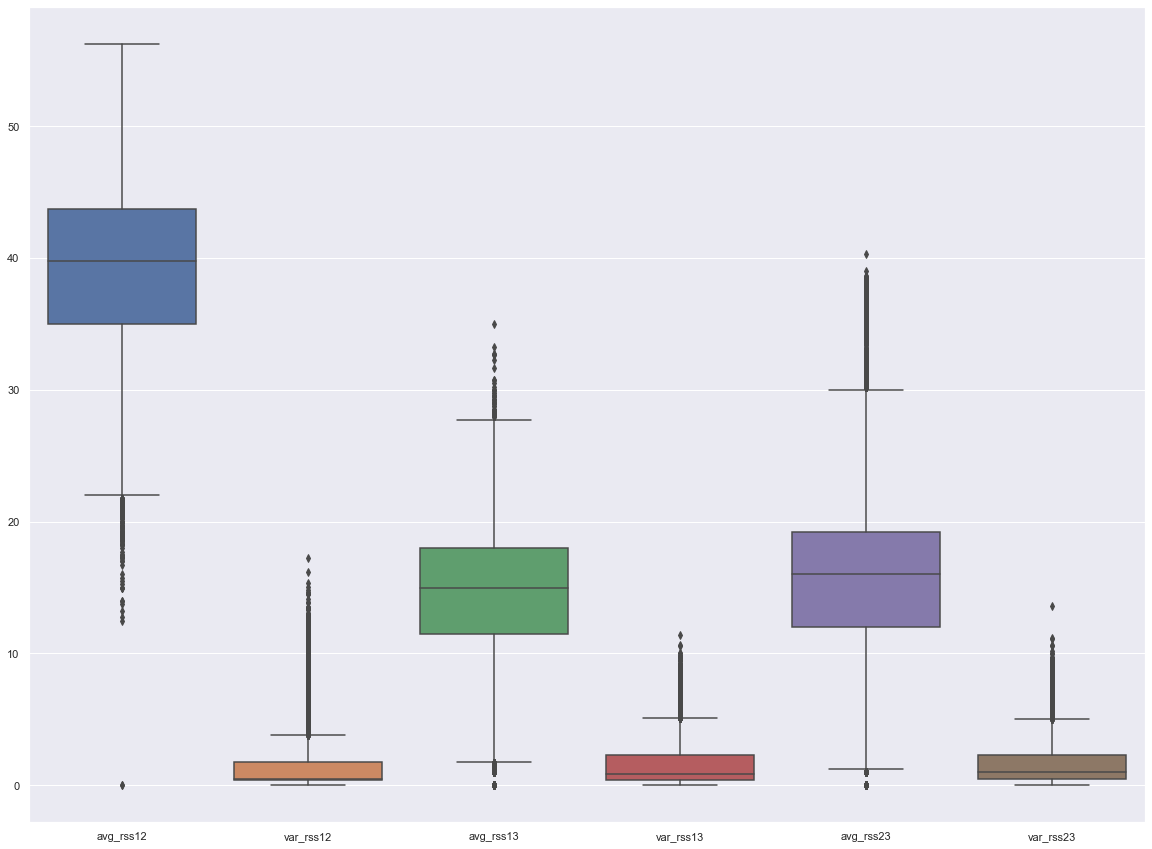

In [18]:
sns.set(rc={'figure.figsize':(20,15)})
sns.boxplot(data=combined_df)

In [19]:
combined_df.columns

Index(['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23',
       'var_rss23', 'label'],
      dtype='object')

In [20]:
df_new = combined_df.copy()

In [21]:
q = df_new['avg_rss12'].quantile(.02)
df_new = df_new[df_new['avg_rss12'] > q]

q = df_new['var_rss12'].quantile(.97)
df_new = df_new[df_new['var_rss12'] < q]

q = df_new['avg_rss13'].quantile(.98)
df_new = df_new[df_new['avg_rss13'] < q]

q = df_new['var_rss13'].quantile(.98)
df_new = df_new[df_new['var_rss13'] < q]

q = df_new['avg_rss23'].quantile(.98)
df_new = df_new[df_new['avg_rss23'] < q]

q = df_new['var_rss23'].quantile(.99)
df_new = df_new[df_new['var_rss23'] < q]


<AxesSubplot:>

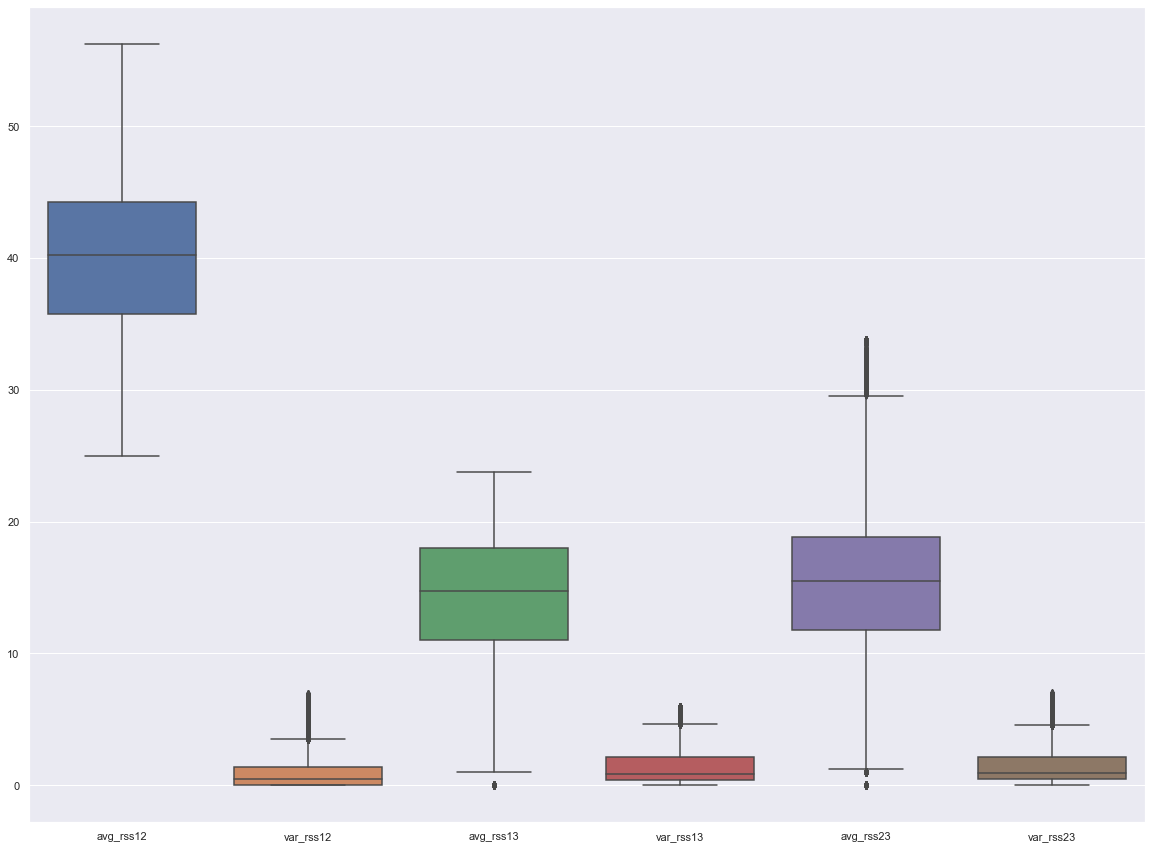

In [22]:
sns.boxplot(data=df_new)

In [23]:
df_new.reset_index(inplace=True, drop=True)

In [24]:
df_new.shape

(37107, 7)

In [25]:
df_new.corr()

avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23
avg_rss12   1.000000  -0.381548  -0.052019  -0.297523  -0.047025  -0.288079
var_rss12  -0.381548   1.000000   0.211246   0.585887   0.129603   0.579126
avg_rss13  -0.052019   0.211246   1.000000   0.106006   0.395679   0.226132
var_rss13  -0.297523   0.585887   0.106006   1.000000   0.173580   0.561435
avg_rss23  -0.047025   0.129603   0.395679   0.173580   1.000000   0.017159
var_rss23  -0.288079   0.579126   0.226132   0.561435   0.017159   1.000000

<AxesSubplot:>

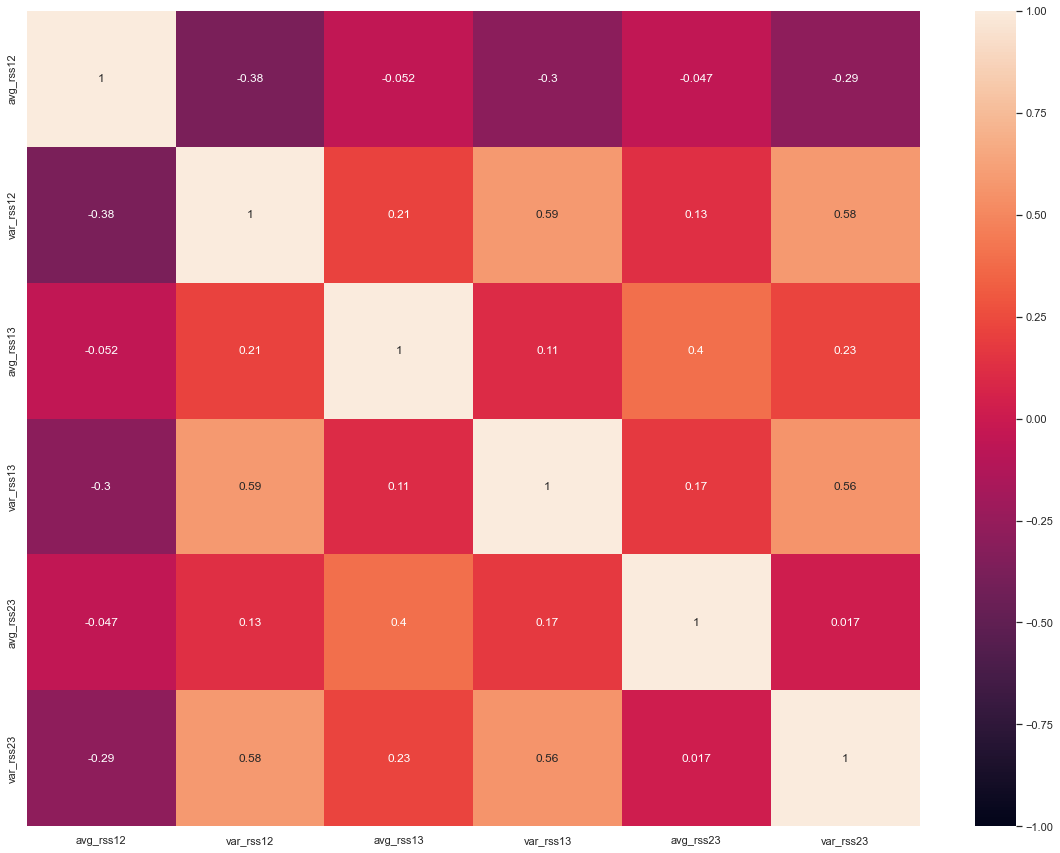

In [26]:
sns.heatmap(df_new.corr(), annot=True, vmin=-1, vmax=1)

In [27]:
ord_enc = OrdinalEncoder()
df_new["label"] = ord_enc.fit_transform(df_new[['label']])

In [28]:
df_new

avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23  label
0          39.25       0.43      22.75       0.43      33.75       1.30    0.0
1          39.25       0.43      23.00       0.00      33.00       0.00    0.0
2          39.25       0.43      23.25       0.43      33.00       0.00    0.0
3          39.50       0.50      23.00       0.71      33.00       0.00    0.0
4          39.00       0.00      23.75       0.43      33.00       0.00    0.0
...          ...        ...        ...        ...        ...        ...    ...
37102      36.00       2.45      14.75       4.55      14.67       3.40    6.0
37103      31.50       1.66      12.50       3.20      14.25       4.44    6.0
37104      27.33       1.25      11.33       0.94      20.00       4.00    6.0
37105      33.75       1.30      15.75       5.21      16.50       2.69    6.0
37106      32.67       3.09      18.67       0.47      14.00       3.16    6.0

[37107 rows x 7 columns]

In [29]:
#splitting feature and target
y = df_new['label']
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
37102    6.0
37103    6.0
37104    6.0
37105    6.0
37106    6.0
Name: label, Length: 37107, dtype: float64

In [30]:
X = df_new.drop(columns=['label'])
X

avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23
0          39.25       0.43      22.75       0.43      33.75       1.30
1          39.25       0.43      23.00       0.00      33.00       0.00
2          39.25       0.43      23.25       0.43      33.00       0.00
3          39.50       0.50      23.00       0.71      33.00       0.00
4          39.00       0.00      23.75       0.43      33.00       0.00
...          ...        ...        ...        ...        ...        ...
37102      36.00       2.45      14.75       4.55      14.67       3.40
37103      31.50       1.66      12.50       3.20      14.25       4.44
37104      27.33       1.25      11.33       0.94      20.00       4.00
37105      33.75       1.30      15.75       5.21      16.50       2.69
37106      32.67       3.09      18.67       0.47      14.00       3.16

[37107 rows x 6 columns]

In [31]:
# StandardScaler - to make normal distribution

In [32]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)
ProfileReport(pd.DataFrame(X_scaled))

Summarize dataset:   0%|          | 0/19 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [33]:
ProfileReport(pd.DataFrame(X_scaled)).to_file('activity_recogition_after_scaled.html')

Summarize dataset:   0%|          | 0/19 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [34]:
X_scaled_df = pd.DataFrame(X_scaled)
X_scaled_df.head()

0         1         2         3         4         5
0 -0.032532 -0.487243  1.708199 -0.653220  3.150488 -0.136523
1 -0.032532 -0.487243  1.756187 -0.954686  3.023029 -1.025274
2 -0.032532 -0.487243  1.804174 -0.653220  3.023029 -1.025274
3  0.009323 -0.442908  1.756187 -0.456917  3.023029 -1.025274
4 -0.074387 -0.759588  1.900149 -0.653220  3.023029 -1.025274

<AxesSubplot:>

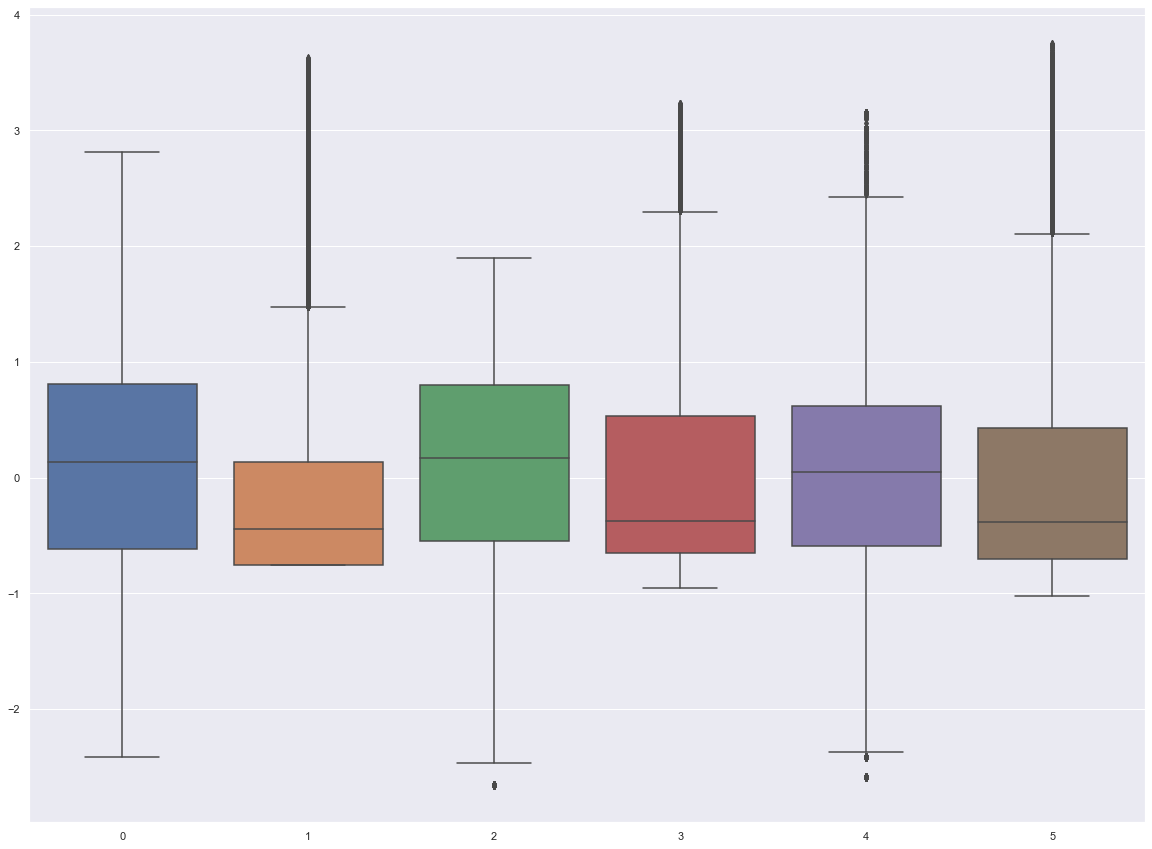

In [37]:
sns.boxplot(data = X_scaled_df)

In [38]:
#check multicoliniarity

In [39]:
X_scaled

array([[-0.03253197, -0.4872431 ,  1.70819925, -0.65322038,  3.1504876 ,
        -0.13652284],
       [-0.03253197, -0.4872431 ,  1.75618668, -0.95468591,  3.02302869,
        -1.02527431],
       [-0.03253197, -0.4872431 ,  1.80417411, -0.65322038,  3.02302869,
        -1.02527431],
       ...,
       [-2.02817023,  0.03211209, -0.48386658, -0.29566824,  0.81374095,
         1.70934559],
       [-0.95333822,  0.06378009,  0.36455119,  2.69795459,  0.21893271,
         0.81375757],
       [-1.13415108,  1.19749447,  0.92504438, -0.62517707, -0.20593032,
         1.13507541]])

In [40]:
X_scaled.shape[1]
#  [[x.columns[i], variance_inflation_factor(arr,i)] for i in range(arr.shape[1])]

6

In [41]:
for i in range(X_scaled.shape[1]):
    #print(i)
    #print(X.columns[i])
    vif_value = variance_inflation_factor(X_scaled,i)
    print([X.columns[i], variance_inflation_factor(X_scaled,i)])
    #print(pd.DataFrame([X.columns[i], variance_inflation_factor(X_scaled,i)]))

['avg_rss12', 1.1880072299702484]
['var_rss12', 1.899158517281906]
['avg_rss13', 1.2892202785758589]
['var_rss13', 1.805125557102751]
['avg_rss23', 1.2600960426250598]
['var_rss23', 1.8087860425895306]


In [42]:
def vif_score(features):
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)
    return pd.DataFrame([[features.columns[i], variance_inflation_factor(features_scaled,i)] for i in range(features_scaled.shape[1])], columns=["FEATURE", "VIF_SCORE"])


In [49]:
VIF_score_df = vif_score(X)
VIF_score_df

FEATURE  VIF_SCORE
0  avg_rss12   1.188007
1  var_rss12   1.899159
2  avg_rss13   1.289220
3  var_rss13   1.805126
4  avg_rss23   1.260096
5  var_rss23   1.808786

In [50]:
VIF_score_df['VIF_SCORE'] > 10

0    False
1    False
2    False
3    False
4    False
5    False
Name: VIF_SCORE, dtype: bool

##### VIF score for all the features are below 10, so Featues doesnot have multicollinearity. Inaddition we checked multicollinearity using df.corr() and heatmap plot

In [51]:
# train test split

In [52]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=7)

In [53]:
#applying gridsearchcv to find mean test score

# C -> regularization parameter
#n_jobs=-1 -> It will consume all the cores if not specified it will consume only one core

solver_list = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
parameters = dict(solver=solver_list)
lr = LogisticRegression(random_state=7, multi_class="auto", n_jobs=-1, C=1)
clf = GridSearchCV(lr, parameters, cv=5)
clf.fit(x_train, y_train)
scores = clf.cv_results_['mean_test_score']

C:\Users\jagan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn("'n_jobs' > 1 does not have any effect when"
C:\Users\jagan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn("'n_jobs' > 1 does not have any effect when"
C:\Users\jagan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn("'n_jobs' > 1 does not have any effect when"
C:\Users\jagan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


In [54]:
eval_df = pd.DataFrame(solver_list,columns=['solver'])
eval_df['grid_search_mean_test_score'] = scores
eval_df

solver  grid_search_mean_test_score
0  liblinear                     0.634731
1  newton-cg                     0.654472
2      lbfgs                     0.654472
3        sag                     0.654472
4       saga                     0.654472

In [55]:
# auc score
# we can do this in above for lr model and loop, but for learning purpose have done like this
# roc_auc_score requires predict_proba(x), not predicted value
# auto’ selects ‘ovr’ if the data is binary, or if solver=’liblinear’, and otherwise selects ‘multinomial’.

roc_list = []
solvers = ['liblinear','newton-cg', 'sag', 'saga', 'lbfgs']

for sol in solvers: 

    logreg = LogisticRegression(random_state=7, multi_class="auto", n_jobs=-1, C=1)
    logreg.fit(x_train, y_train)
    y_pred = logreg.predict(x_test)
    auc = roc_auc_score(y_test, logreg.predict_proba(x_test), multi_class='ovr')
    score_test_data = logreg.score(x_test, y_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    roc_list.append([score_test_data, auc,accuracy,precision,recall])
    

In [56]:
eval_df[['score_test_data','roc_auc_score', 'accuracy','precision','recall']] = roc_list
eval_df

solver  grid_search_mean_test_score  score_test_data  roc_auc_score  \
0  liblinear                     0.634731         0.656696        0.92953   
1  newton-cg                     0.654472         0.656696        0.92953   
2      lbfgs                     0.654472         0.656696        0.92953   
3        sag                     0.654472         0.656696        0.92953   
4       saga                     0.654472         0.656696        0.92953   

   accuracy  precision    recall  
0  0.656696   0.654697  0.656696  
1  0.656696   0.654697  0.656696  
2  0.656696   0.654697  0.656696  
3  0.656696   0.654697  0.656696  
4  0.656696   0.654697  0.656696

In [57]:
#saga performs well compared with other solvers
#so, creating final model using saga solver

In [58]:
final_model = LogisticRegression(solver='saga', multi_class='auto')
final_model.fit(x_train, y_train)
y_pred_new = final_model.predict(x_test)

In [59]:
#save the model
file = 'activity_recognition_logistic_reg.sav'
pickle.dump(final_model,open(file,'wb'))

In [60]:
cm = confusion_matrix(y_test,y_pred_new)
cm

array([[ 279,    1,   14,    0,   89,    2,    0],
       [  21,  284,   17,   43,   42,    0,    4],
       [   3,    8,  780,    0,   63,   18,  331],
       [   0,   45,    1, 1256,   30,  121,    4],
       [  57,   78,   43,  198,  705,  303,    4],
       [   1,    0,   30,  131,  415,  895,    3],
       [   1,    7,  403,    0,   18,    1,  673]], dtype=int64)

Text(156.5, 0.5, 'Truth')

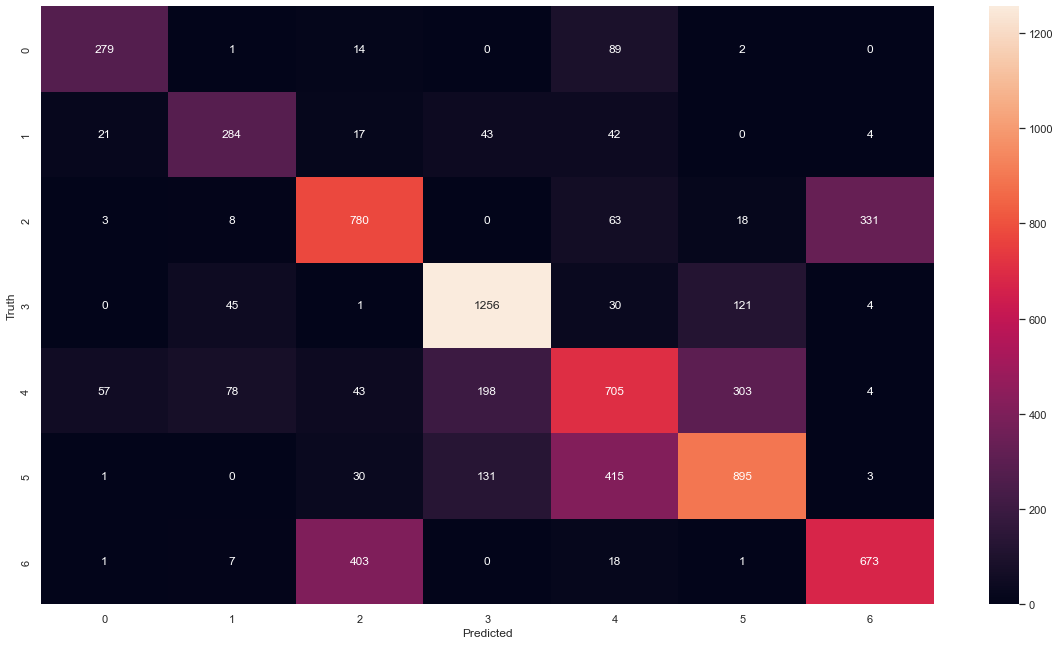

In [61]:
#visualizing confusion matrix
plt.figure(figsize = (20,11))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [62]:
#classification report
#target wise precision  recall  f1-score 
print(classification_report(y_test,y_pred_new))

              precision    recall  f1-score   support

         0.0       0.77      0.72      0.75       385
         1.0       0.67      0.69      0.68       411
         2.0       0.61      0.65      0.63      1203
         3.0       0.77      0.86      0.81      1457
         4.0       0.52      0.51      0.51      1388
         5.0       0.67      0.61      0.64      1475
         6.0       0.66      0.61      0.63      1103

    accuracy                           0.66      7422
   macro avg       0.67      0.66      0.66      7422
weighted avg       0.65      0.66      0.65      7422



In [1]:
VIF_score_df

NameError: name 'VIF_score_df' is not defined